In [1]:
!pip install efficientnet

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout, Activation, Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
epochs = 10
train_dir = '/content/drive/My Drive/datasets/UcClass/train'
validation_dir = '/content/drive/My Drive/datasets/UcClass/val'

In [0]:
from efficientnet.tfkeras import EfficientNetB1 as enet
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        batch_size=32,
        # All images will be resized to target height and width.
        target_size=(224, 224),
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 4640 images belonging to 3 classes.
Found 1163 images belonging to 3 classes.


In [15]:
model = enet(include_top=False, input_shape=(224,224,3), pooling='avg', weights='imagenet')
for layer in model.layers:
    layer.trainable = False
# 2 tam bağlantı katmanının B0'a eklenmesi
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Çıkış katmanı
predictions = Dense(3, activation="softmax")(x)

model_final = Model(inputs = model.input, outputs = predictions)

model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
____________________________________________________________________________________________

Epoch 1/10
145/145 [==============================] - 146s 1s/step - loss: 1.0349 - acc: 0.5056 - val_loss: 0.8641 - val_acc: 0.7786
Epoch 2/10
145/145 [==============================] - 146s 1s/step - loss: 0.7980 - acc: 0.6631 - val_loss: 0.6123 - val_acc: 0.8793
Epoch 3/10
145/145 [==============================] - 145s 1s/step - loss: 0.6481 - acc: 0.7412 - val_loss: 0.4489 - val_acc: 0.9089
Epoch 4/10
145/145 [==============================] - 145s 997ms/step - loss: 0.5671 - acc: 0.7890 - val_loss: 0.3525 - val_acc: 0.9262
Epoch 5/10
145/145 [==============================] - 144s 993ms/step - loss: 0.4861 - acc: 0.8263 - val_loss: 0.2961 - val_acc: 0.9349
Epoch 6/10
145/145 [==============================] - 144s 994ms/step - loss: 0.4570 - acc: 0.8353 - val_loss: 0.2611 - val_acc: 0.9401
Epoch 7/10
145/145 [==============================] - 144s 994ms/step - loss: 0.4155 - acc: 0.8573 - val_loss: 0.2349 - val_acc: 0.9444
Epoch 8/10
145/145 [==============================] - 145

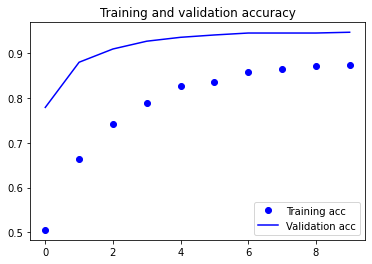

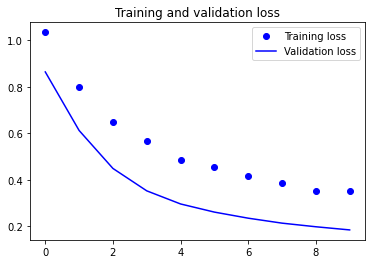

In [16]:
model_final.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model_final.fit_generator(
      train_generator,
      steps_per_epoch= train_generator.n//train_generator.batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps= validation_generator.n//validation_generator.batch_size)

model_final.save('/content/drive/My Drive/datasets/UcClass/efficientNetB1UygulamaAlternatifE10.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()